In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

In [2]:
import numpy as np
from sklearn.datasets import make_moons

def make_moons_random_assignment(n_samples, noise=0, seed=0):
    np.random.seed(seed)
    X, l = make_moons(n_samples=n_samples, random_state=seed, noise=noise)
    return X, l


np.random.seed(0)
random_seeds = np.random.choice(1_000_000, replace=False, size=10)
twoMoons_noises = np.arange(0, 0.21, 0.01)
twoMoons_datasets = [
    [make_moons_random_assignment(500, noise=noise, seed=seed) for seed in random_seeds]
    for noise in twoMoons_noises
]

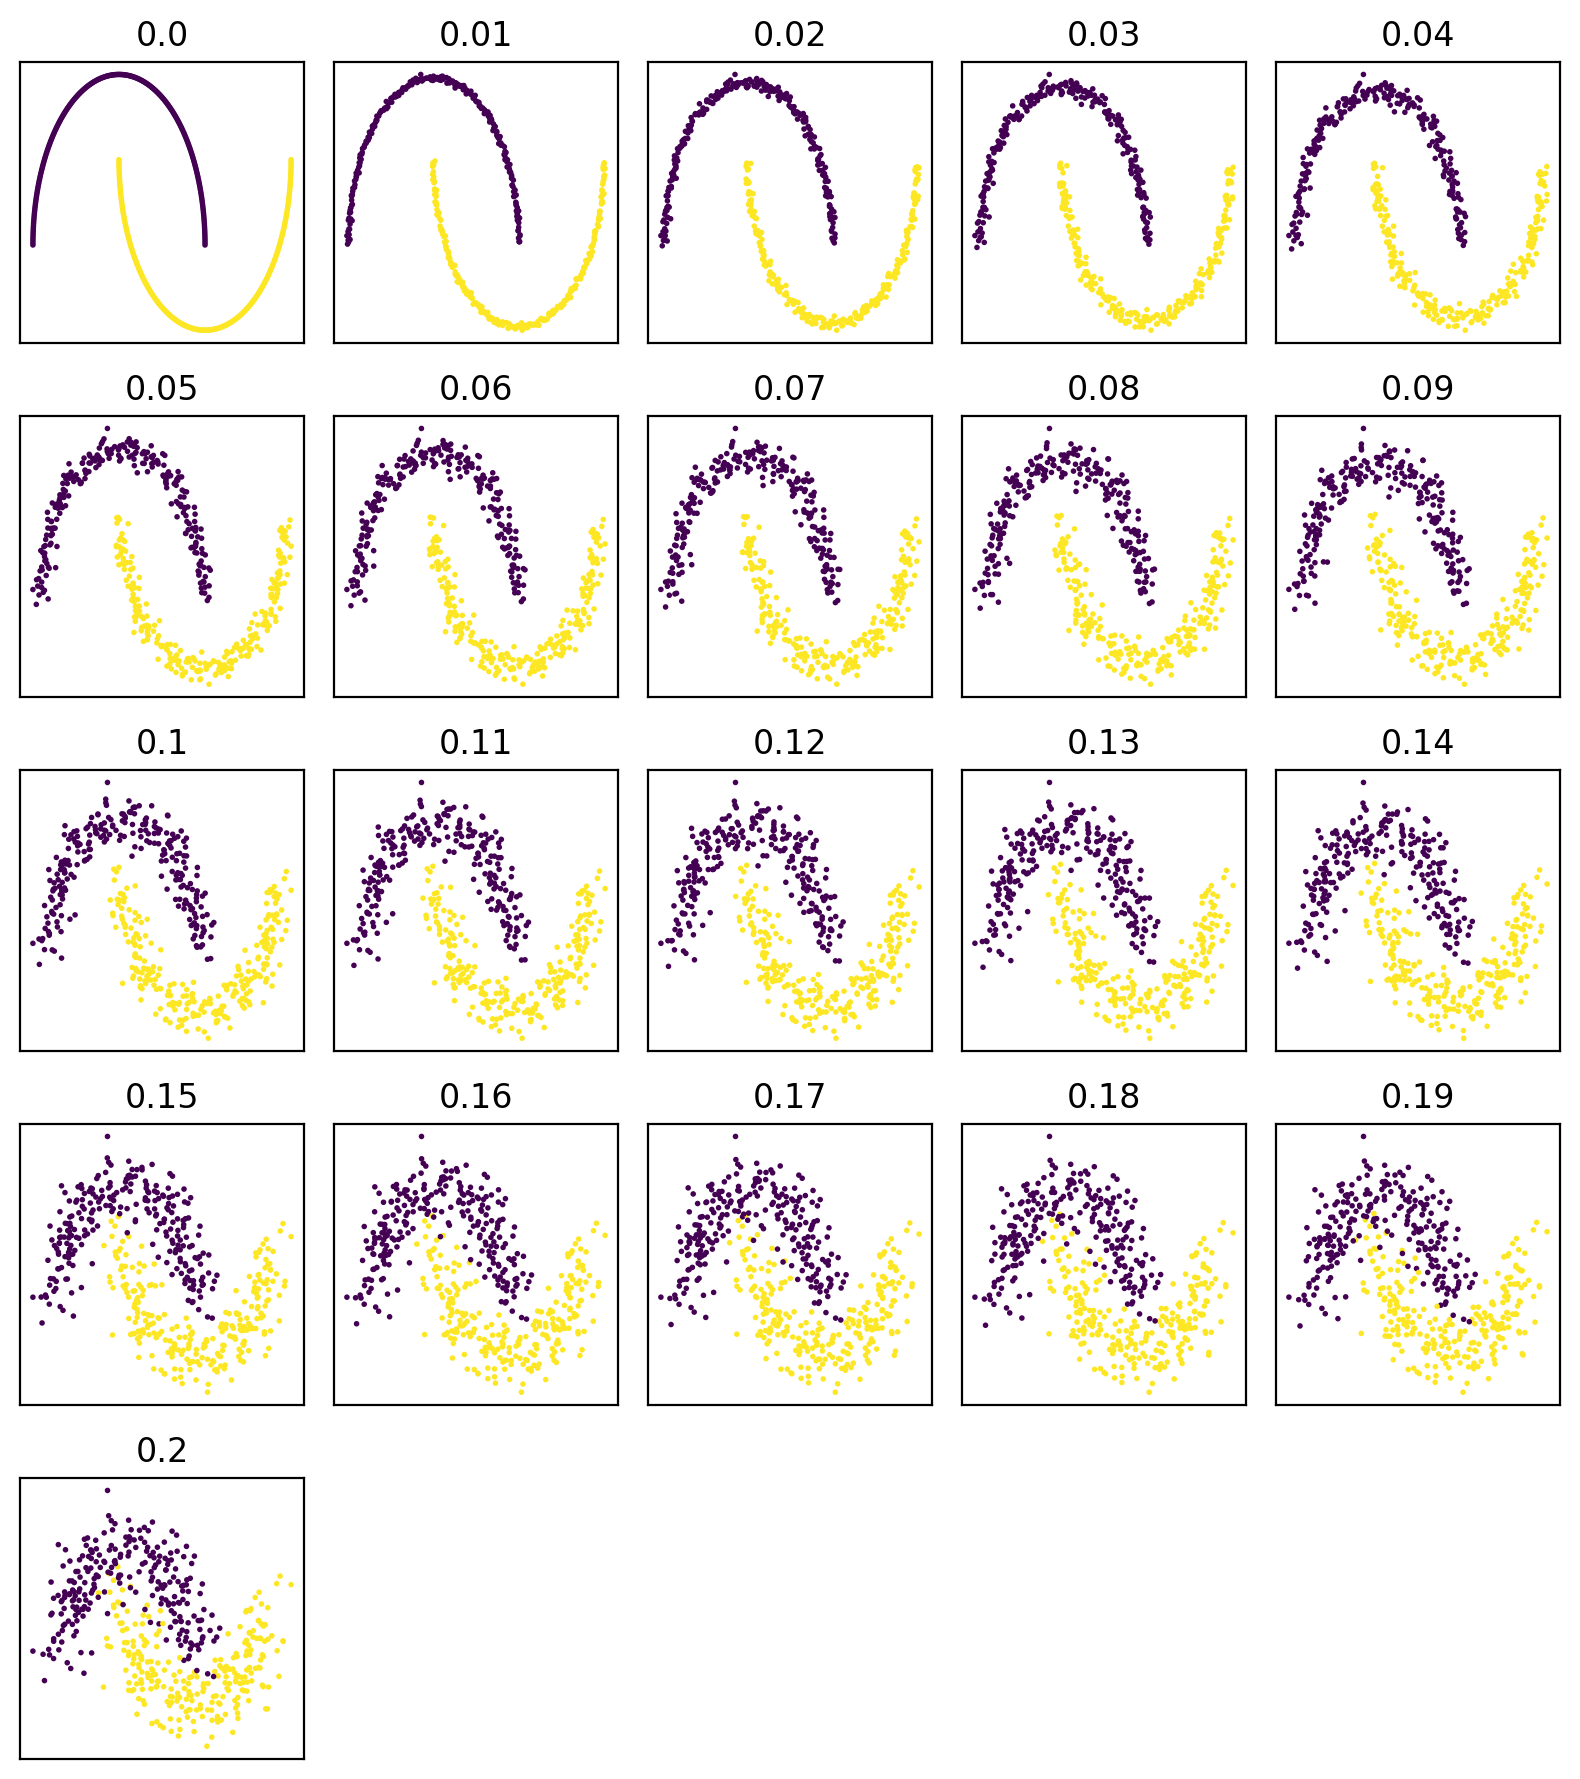

In [3]:
import matplotlib.pyplot as plt
from src.utils.plots import plot_datasets

plot_datasets(twoMoons_datasets, twoMoons_noises, n_cols=5, figsize=1.6)
plt.savefig("imgs/TwoMoons_noise_data.png", bbox_inches="tight", pad_inches=0)

In [4]:
from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets
from src.utils.metrics import create_and_rescale_df, SELECTED_METRICS


eval_results = cache(
    "TwoMoons_noise",
    calc_eval_measures_for_multiple_datasets,
    [twoMoons_datasets, twoMoons_noises],
    recalc=False,
)

selected_metrics_ = SELECTED_METRICS.copy()
selected_metrics_.remove("S_DBW")
selected_metrics_.remove("CVNN")

df = create_and_rescale_df(eval_results, selected_metrics=selected_metrics_)

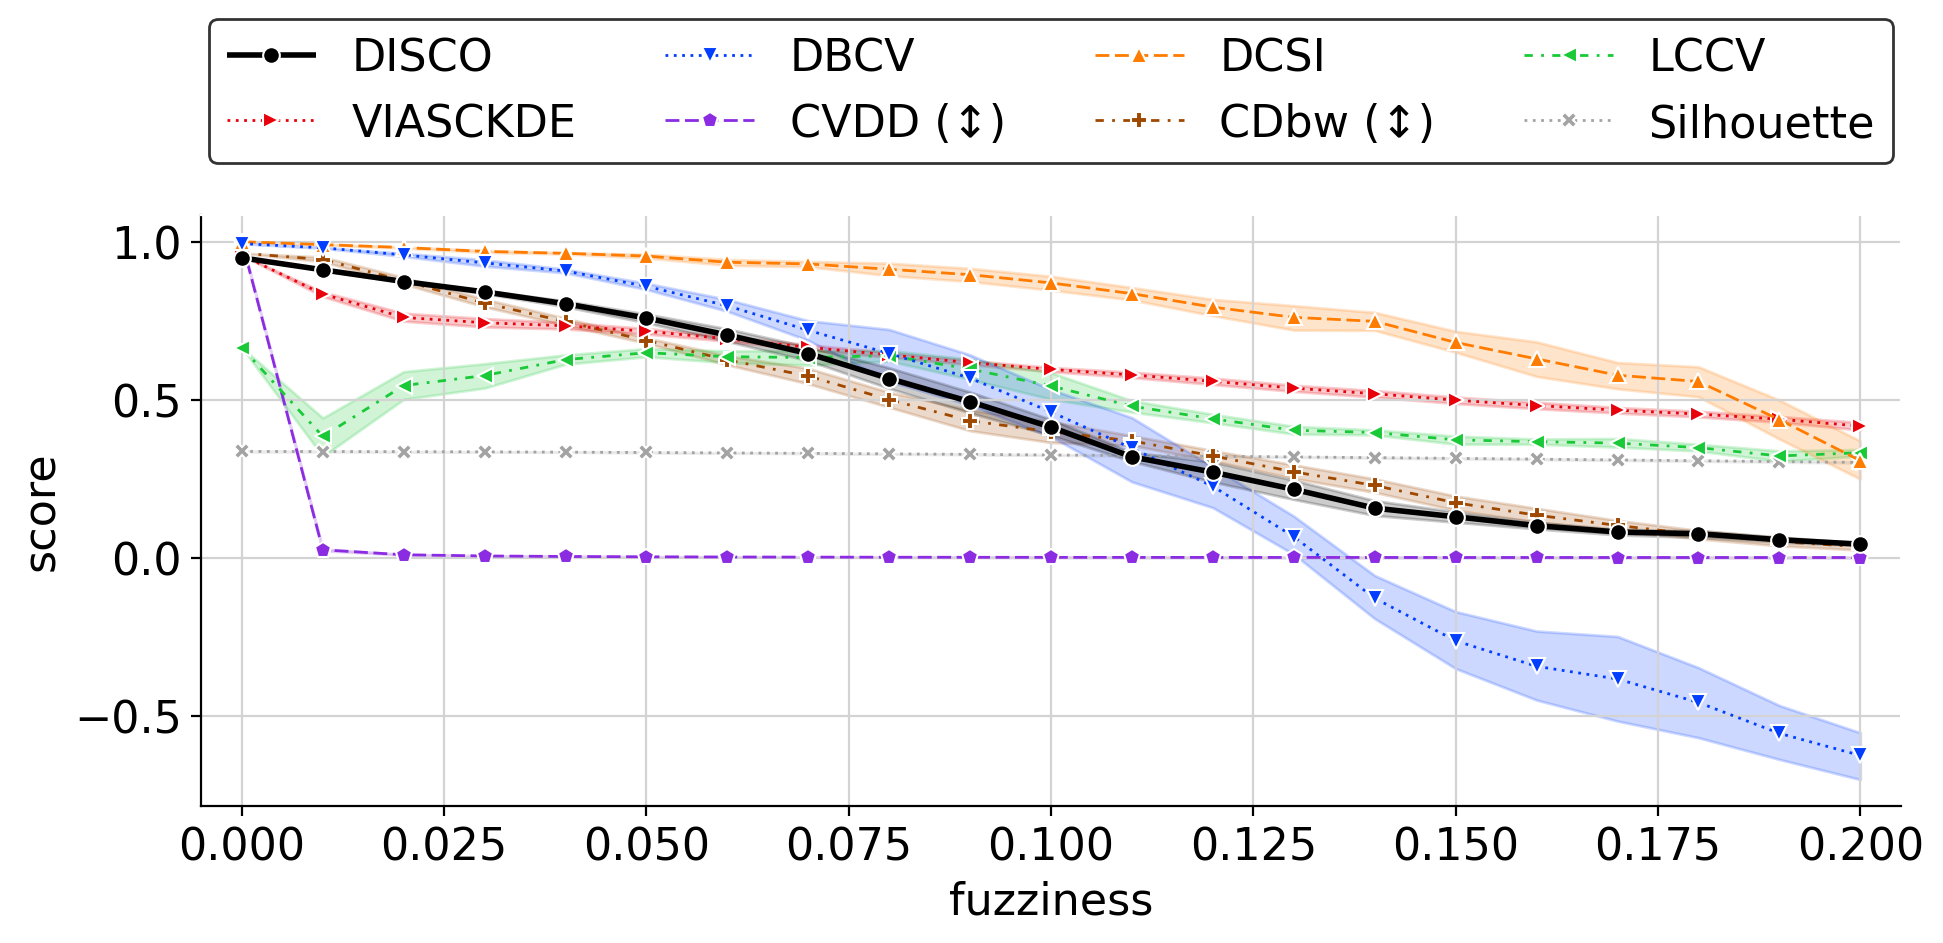

In [5]:
from src.utils.plots import plot_lineplot, GRAY
import seaborn as sns

eps = 0.005
x_range = twoMoons_noises[0] - eps, twoMoons_noises[-1] + eps

fig = plot_lineplot(
    df,
    "dataset",
    "value",
    "measure",
    y_label="score",
    x_label="fuzziness",
    x_range=x_range,
    y_range=(None, None),
    figsize=(10, 5),
    palette=["black"] + sns.color_palette("bright")[:6] + [GRAY],
)
ax = fig.gca()
# ax.set_xticks(range(0, 16, 3))
plt.savefig("imgs/TwoMoons_noise.png", bbox_inches="tight", pad_inches=0)

In [20]:
import pandas as pd
from src.utils.metrics import DISCO

from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets
from src.utils.metrics import create_and_rescale_df, SELECTED_METRICS

selected_metrics_ = SELECTED_METRICS.copy()

min_points_list = range(1, 31, 2)

MIN_POINTS_DISCO = {
    min_points: lambda X, l, min_points=min_points: DISCO(X, l, min_points=min_points) for min_points in min_points_list
}

eval_results = cache(
    "TwoMoons_noise_DISCO_min_points",
    calc_eval_measures_for_multiple_datasets,
    [twoMoons_datasets, twoMoons_noises],
    {"metrics": MIN_POINTS_DISCO},
    recalc=False,
)

# selected_metrics_.remove("S_DBW")
# selected_metrics_.remove("CVNN")

df = create_and_rescale_df(eval_results, selected_metrics=MIN_POINTS_DISCO.keys())

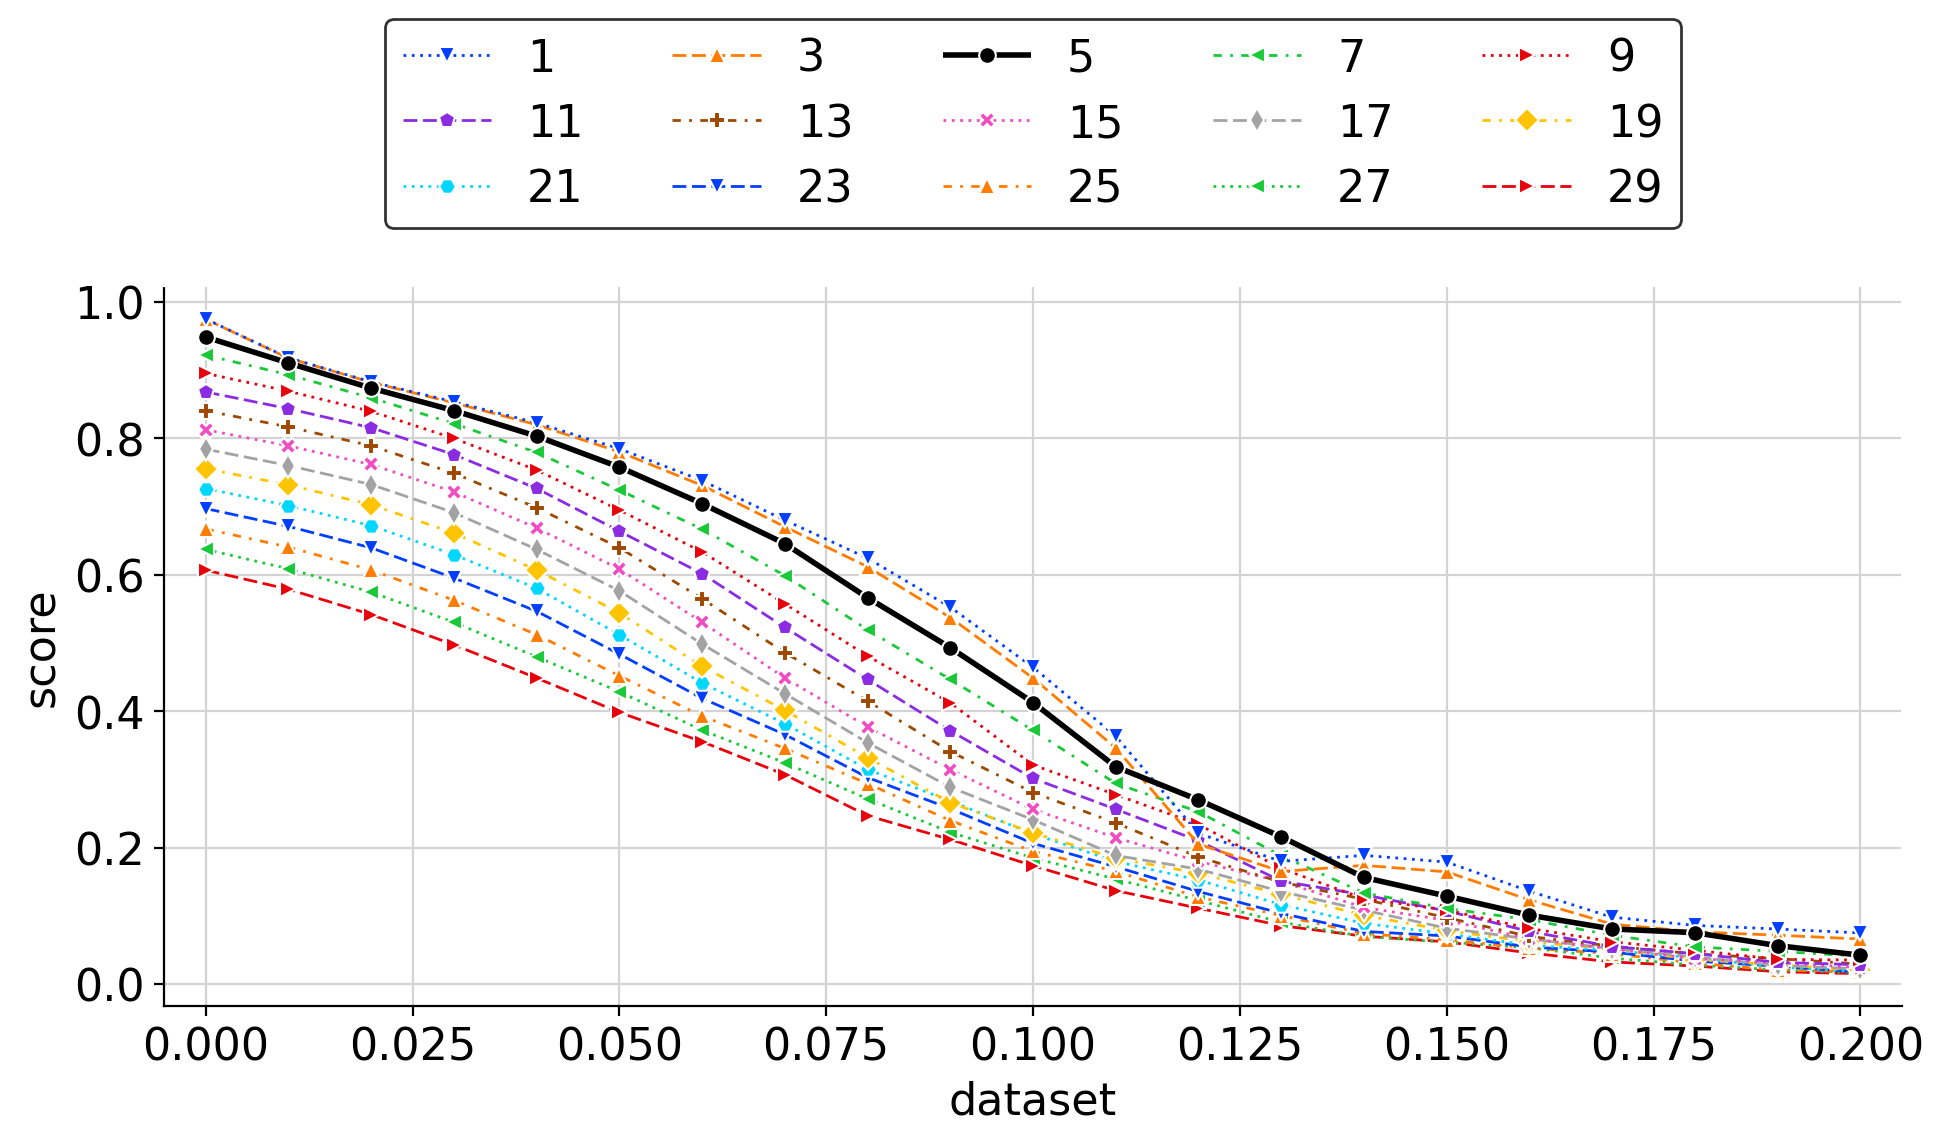

In [22]:
from src.utils.plots import plot_lineplot

eps = 0.005
x_range = twoMoons_noises[0] - eps, twoMoons_noises[-1] + eps

plot_lineplot(
    df,
    "dataset",
    "value",
    "measure",
    y_label="score",
    x_range=x_range,
    y_range=(None, None),
    highlight=3,
    errorbar=None,
    order=None,
    ncol=5,
)
plt.savefig("imgs/TwoMoons_noise_DISCO_min_points.png")